# TP2: Optimización

Para este trabajo se busca la implementación de una SVM (Support Vector Machine). Dado que las SVM
son un ejemplo de clasificadores que responden a la solución de un problema de optimización convexo, el
objetivo es que el alumno pueda internalizarse con conceptos de optimización a partir de un ejemplo práctico
y de interés.

In [89]:
import numpy as np
import matplotlib.pyplot as plt

1. Escribir una función que calcule el gradiente para la función de costo J(w, b) dada por (1).

Se busca obtener el hiperplano de la forma $w^T x + b$ que separe las observaciones de acuerdo a su clase. El problema puede verse como la minimización de la función de costo dada por:

$J(w, b) = \frac{1}{2} ||w||^2 + C \sum\limits_{i=1}^n max\{0, 1 - y_i(w^T x + b)\}$

Dado que se utilizará el método del gradiente descendiente, la función de costo puede obtenerse como:

In [90]:
def cost_function(w, x, y, C, b):      
  return 0.5 * np.linalg.norm(w) ** 2 + C * max(0, 1 - y * (w.T.dot(x) + b))

2. Usar la función del item anterior para implementar el algoritmo de gradiente descendiente estocástico
(SGD). Usar como criterio de corte la variación en la función de pérdida entre un paso y el siguiente
(cortar si $ \Delta J< \epsilon$ ).

In [91]:
# Se define la funcion para actualizar los valores de w y b en funcion de los gradientes
def SGD_update(w, b, grads, hyper_params):
    w = w - hyper_params['lr'] * grads["w"]
    b = b - hyper_params['lr'] * grads["b"] 
    return w, b

In [115]:
# Se define la funcion de optimizacion
def optimize_function(update_func, params, hyper_params, epochs, states=(), add_gradient_noise=False):
    w = params[0]
    b = params[1]
    x = params[2]
    y = params[3]
    # Se definen los parametros para el entrenamiento
    C = 0.1       
    epsilon = 0.001     # Condicion de corte
    loss = [1000]        # Valor inicial de perdida con un valor alto

    for epoch in range(epochs):
        loss_epoch = []
        # Graficar valores de entrenamiento y el hiperplano cada cinco epocas
        if epoch % 5 == 0:
            print("Epoch {epoch}: loss = {J}".format(epoch=epoch, J=loss[-1]))
            print("w = {w}, b = {b}".format(w=w, b=b))
            x_lin = np.linspace(-4, 4, 100)
            y_lin = -w[0] / w[1] * x_lin - b / w[1]
            plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
            plt.plot(x_lin, y_lin, 'k-')
            plt.xlabel("V1")
            plt.ylabel("V2")
            plt.show()
        # Se obtienen los valores de los gradientes y se obtiene la perdida
        for i in range(len(x)):
            grads = {}
            t = y[i] * (w.T.dot(x[i]) + b)
            dl = 1 if t < 1 else 0
            grads = {}
            # Se obtienen los gradientes de con respecto a b y w
            grads["w"] = w + C * dl * (-y[i] * x[i].T)
            grads["b"] = C * dl * (-y[i])

            w, b = update_func(w, b, grads=grads, hyper_params=hyper_params)
            J = cost_function(w, x[i], y[i], C, b)
            loss_epoch.append(J)
        
        # Se calcula la 
        loss.append(sum(loss_epoch))
        if loss[-2] - loss[-1] < 0.001:
            break
         
                
    return w, b, loss[1:]

3. Cargar los datos que se encuentran en el archivo train.csv, y usarlos para entrenar una SVM basándose
en el SGD implementado.

In [93]:
import pandas as pd

# Cargar datos para el entrenamiento
train_df = pd.read_csv('train.csv')
x_1_train = train_df["V1"].to_numpy()
x_2_train = train_df["V2"].to_numpy() 
x_train = np.array([x_1_train, x_2_train]).T
y_train = train_df["label"].to_numpy()

Se procede a entrenar el modelo:

Epoch 0: loss = 1000
w = [ 1 -1], b = [0]


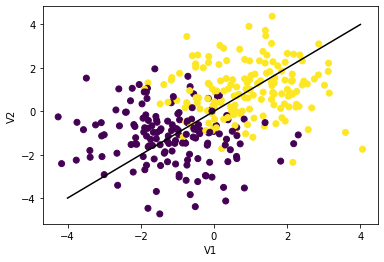

Epoch 5: loss = [45.86183357]
w = [ 0.26619501 -0.11728914], b = [0.0098]


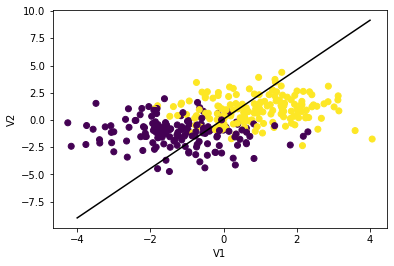

Epoch 10: loss = [29.27802318]
w = [0.13367395 0.05894443], b = [0.0167]


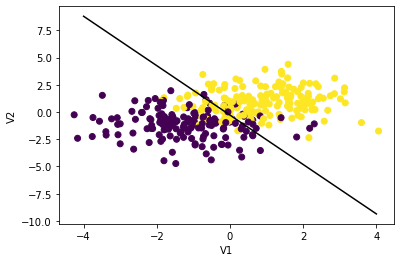

Epoch 15: loss = [28.60837264]
w = [0.10721157 0.09443884], b = [0.0237]


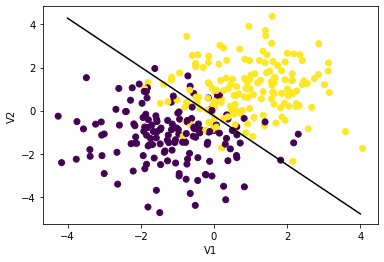

Epoch 20: loss = [28.57187051]
w = [0.10187318 0.1015993 ], b = [0.0307]


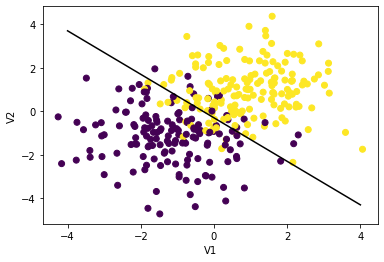

Epoch 25: loss = [28.56101443]
w = [0.10079624 0.10304382], b = [0.0377]


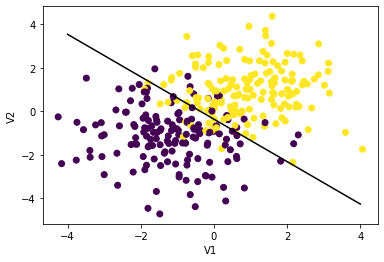

########################################
Los valores obtenidos luego del entrenamiento son
w = [0.10057899 0.10333523], b = [0.0447]


In [109]:
# Se definen los valores iniciales
start_w = np.array([1, -1])
start_b = np.array([0])

# Se define el learning rate y la cantidad de epocas
learning_rate = 0.001
epochs = 30

# Se calculas los valores de w y b que optimizan el problema planteado
w, b, loss = optimize_function(SGD_update, params=[start_w, start_b, x_train, y_train], hyper_params={'lr': learning_rate}, epochs=epochs, add_gradient_noise=False)

print("#"*40)
print("Los valores obtenidos luego del entrenamiento son")
print("w = {w}, b = {b}".format(w=w, b=b))

# Se guardan los obtenidos en sus respectivas variables 
w_g = w 
b_g = b[0]


Text(0, 0.5, 'loss')

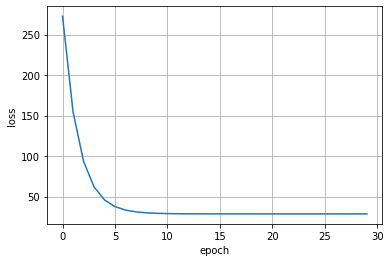

In [110]:
# Se grafican los valores de perdida
plt.plot(range(len(loss)), loss)
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")

4. Importar la función SVC del paquete svm de la librería Scikit-Learn (from sklearn.svm import SVC).
Usarlo para entrenar una SVM. Comparar los valores de w y b obtenidos con esta librería contra los
hallados por gradiente descendiente. Analizar los vectores soporte hallados.

In [112]:
from sklearn.svm import SVC

# Se importa la libreria sklearn y se obtienen los valores de w

C = 0.1
# Se crea el objeto SVC
svm = SVC(C=C, kernel="linear")
# Se entrena con los valores de entrenamiento
svm.fit(x_train, y_train)
# Se obtienen los vectores soporte
svm.support_vectors_
# Obtienen los coeficientes w
w = svm.coef_[0] / np.linalg.norm(svm.coef_[0])
b = svm.intercept_[0]
print("El vector w normal al hiperplano es:\nw = {w}".format(w=w))
print("El valor b de offset :\nb = {b}".format(b=b))
w_s = w
b_s = b

El vector w normal al hiperplano es:
w = [0.69757759 0.71650925]
El valor b de offset :
b = 0.41323590182864467


Text(0, 0.5, 'V2')

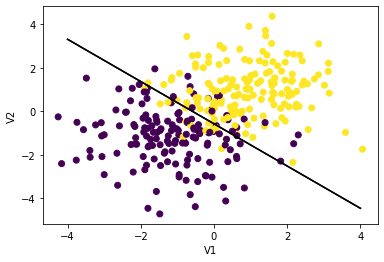

In [116]:
import matplotlib.pyplot as plt

# Se grafican el hiperplano obtenido

x_lin = np.linspace(-4, 4, 100)
y_lin = -w[0] / w[1] * x_lin - b / w[1]

# Graficar valores de entrnamiento y el hiperplano
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.plot(x_lin, y_lin, 'k-')
plt.plot(x_lin, y_lin, 'k-')
plt.xlabel("V1")
plt.ylabel("V2")

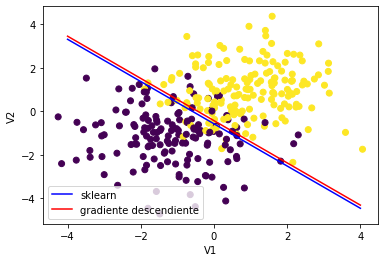

In [117]:
# Se compara con los valores obtenidos utilizando gradiente descendiente
import matplotlib.pyplot as plt

x_lin = np.linspace(-4, 4, 100)
y_lin = -w[0] / w[1] * x_lin - b / w[1]
y_lin_g = -w_g[0] / w_g[1] * x_lin - b_g / w_g[1]

# Graficar valores de entrenamiento y el hiperplano
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.plot(x_lin, y_lin, 'b-', label="sklearn")
plt.plot(x_lin, y_lin_g, 'r-', label="gradiente descendiente")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()

Existen 105 vectores soporte
Se grafican los vectores soporte:


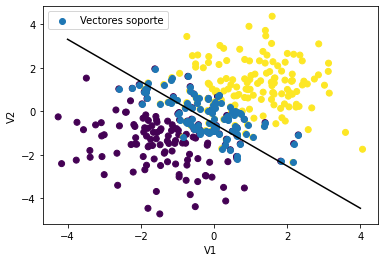

In [118]:
# Se obtienen los vectores soportes
support_vectors = svm.support_vectors_
support_index = svm.support_

print("Existen {} vectores soporte".format(len(support_index)))
print("Se grafican los vectores soporte:")

# Graficar valores de entrnamiento y el hiperplano
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], label="Vectores soporte")
plt.plot(x_lin, y_lin, 'k-')
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()


5. Cargar los datos que se encuentran en el archivo test.csv y analizar la performance de la SVM
entrenada por ambos métodos. Usar como métrica de error la proporción de etiquetas predichas correctamente.
¿Coinciden las predicciones?

In [119]:
# Cargar datos para el testing 
test_df = pd.read_csv('test.csv')
x_1_test = test_df["V1"].to_numpy()
x_2_test = test_df["V2"].to_numpy() 
x_test = np.array([x_1_test, x_2_test]).T
y_test = test_df["label"].to_numpy()

In [120]:
# Obtener el error de clasificacion usando sklearn
score = svm.score(x_test, y_test)
print("La proporcion de muestras clasificadas correctamente es: {score}".format(score=score))

La proporcion de muestras clasificadas correctamente es: 0.9375


In [121]:
# Obtener el error de clasificación con gradiente decendiente
total = 0
success = 0
for i in range(len(x_test)):
    predicted = 1 if (w_g.T.dot(x_test[i]) + b_g) > 0 else -1
    real = y_test[i]
    if predicted == real:
        success += 1
    total += 1

score_g = success / total
print("La proporcion de muestras clasificadas correctamente es: {score}".format(score=score_g))


La proporcion de muestras clasificadas correctamente es: 0.9375


Se obtienen los mismo resultados haciendo la clasificación utilizando la librería sklearn y usando el gradiente descendiente.

6. Analizar que ocurre cuando se quita del dataset de entrenamiento un vector soporte. ¿Y si sacamos
uno que no lo era?

Primero se elimina uno de los vectores soporte y se obtienen los nuevos valores de w y b

In [123]:
import copy
import random

C = 0.1
# Se elimina vector soporte aleatorio
x_train_v = x_train.copy()
y_train_v = y_train.copy()

index = random.choice(support_index)
x_train_v = np.delete(x_train_v, index, 0)
y_train_v = np.delete(y_train_v, index, 0)

svm = SVC(C=C, kernel="linear")
svm.fit(x_train_v, y_train_v)
svm.support_vectors_
w = svm.coef_[0] / np.linalg.norm(svm.coef_[0])
b = svm.intercept_[0]
print("El vector w normal al hiperplano es:\nw = {w}".format(w=w))
print("El valor b de offset :\nb = {b}".format(b=b))


El vector w normal al hiperplano es:
w = [0.68412325 0.72936643]
El valor b de offset :
b = 0.36175473015508547


Al eliminar uno de los vectores soporte de los valores de entrenamiento se modifican los valores de w y de b resultantes.

Posteriormente se hace lo mismo pero eliminando uno de los vectores que no eran soporte

In [124]:
C = 0.1
# Se elimina un dato del dataset de entrenamiento que no es vector soporte
x_train_v = x_train.copy()
y_train_v = y_train.copy()

non_support_index = [i for i in range(len(x_train)) if i not in support_index]
index = random.choice(non_support_index)
x_train_v = np.delete(x_train_v, index, 0)
y_train_v = np.delete(y_train_v, index, 0)

svm = SVC(C=C, kernel="linear")
svm.fit(x_train_v, y_train_v)
svm.support_vectors_
w = svm.coef_[0] / np.linalg.norm(svm.coef_[0])
b = svm.intercept_[0]
print("El vector w normal al hiperplano es:\nw = {w}".format(w=w))
print("El valor b de offset :\nb = {b}".format(b=b))


El vector w normal al hiperplano es:
w = [0.69757759 0.71650925]
El valor b de offset :
b = 0.41323590182864467


En caso de que retire del dataset un valor que no forme parte de los vectores de soporte, el valor de w y b no se ven modificados.